### Project_Summary

**Domain: Banking and finance**

The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests

The purpose is to design an AIML model to perform focused marketing by predicting the potential customers who will take the loan  using the historical dataset.

The data consists of all the attributes of their customers participated in the last compaign and the target column who has takn the loan in the last compaign.

Below are features:
1. ID 2. Age 3. CustomerSince 4. HighestSpend 5. ZipCode 6. HiddenScore 7. MonthlyAverageSpend 8. Level 9. Mortgage 10. Security 11. FixedDepositAccount 12. InternetBanking 13. CreditCard 14. LoanOnCard

Tasks performed:

1. Importing and cleaning the data
2. Data analysis and visualisation
3. Data preprocessing
4. Model training, testing and tuning
5. Conclusion


## Importing and merging the data sets

In [1081]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing and merging the data sets**

In [1113]:
data_set1=pd.read_csv("Part2 - Data1.csv")
data_set2=pd.read_csv("Part2 -Data2.csv")

In [1114]:
print(data_set1.shape)
print(data_set2.shape)

(5000, 8)
(5000, 7)


Number of rows is same 

In [1115]:
print(data_set1.head())
print(data_set2.head())

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2  
   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0       

In [1116]:
print(data_set1.tail())
print(data_set2.tail())

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
4995  4996   29              3            40    92697            1   
4996  4997   30              4            15    92037            4   
4997  4998   63             39            24    93023            2   
4998  4999   65             40            49    90034            3   
4999  5000   28              4            83    92612            3   

      MonthlyAverageSpend  Level  
4995                  1.9      3  
4996                  0.4      1  
4997                  0.3      3  
4998                  0.5      2  
4999                  0.8      1  
        ID  Mortgage  Security  FixedDepositAccount  InternetBanking  \
4995  4996         0         0                    0                1   
4996  4997        85         0                    0                1   
4997  4998         0         0                    0                0   
4998  4999         0         0                    0                1   
4999  500

Both data sets have same number of rows

Both data sets have same index column.

In [1117]:
#Merging the data sets
ds = pd.merge(data_set1, data_set2, on="ID")

In [1118]:
ds.shape

(5000, 14)

In [1119]:
ds.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [1120]:
ds.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


**It can be observed that CustomerSince has minimum value of -3.i.e; a negative number. But number of years cannot be negative**
**This will be taken care after removing any null values**

**Checking the null values**

In [1121]:
ds.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Only LoadOnCard has 20 null values and remaining fields have no null values. We can drop those 20 rows, which have LoanOnCard value as null, as LoadOnCard is dependent variable.

In [1122]:
#Removing the 20 rows which has null values
ds.dropna(inplace=True)

In [1123]:
#shape of dataframe after removing the 20 rows
ds.shape

(4980, 14)

In [1124]:
ds.LoanOnCard.value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

It is highly imbalanced data set

**Checking the negative values in the CustomerSince column and changing them to positive values**

In [1125]:
print((ds['CustomerSince']<0).value_counts())

False    4929
True       51
Name: CustomerSince, dtype: int64


CustomerSince column has 51 negative values

In [1126]:
#Changing negative values to positive
ds['CustomerSince']=ds['CustomerSince'].abs()
(ds['CustomerSince']<0).value_counts()

False    4980
Name: CustomerSince, dtype: int64

In [1127]:
ds.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

ID column can be dropped as it won't influence our outcome

In [1128]:
#Dropping the ID column
ds.drop(['ID'], axis=1, inplace=True)

<AxesSubplot:xlabel='LoanOnCard', ylabel='Count'>

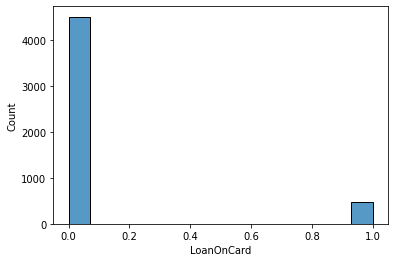

In [1129]:
sns.histplot(ds['LoanOnCard'])

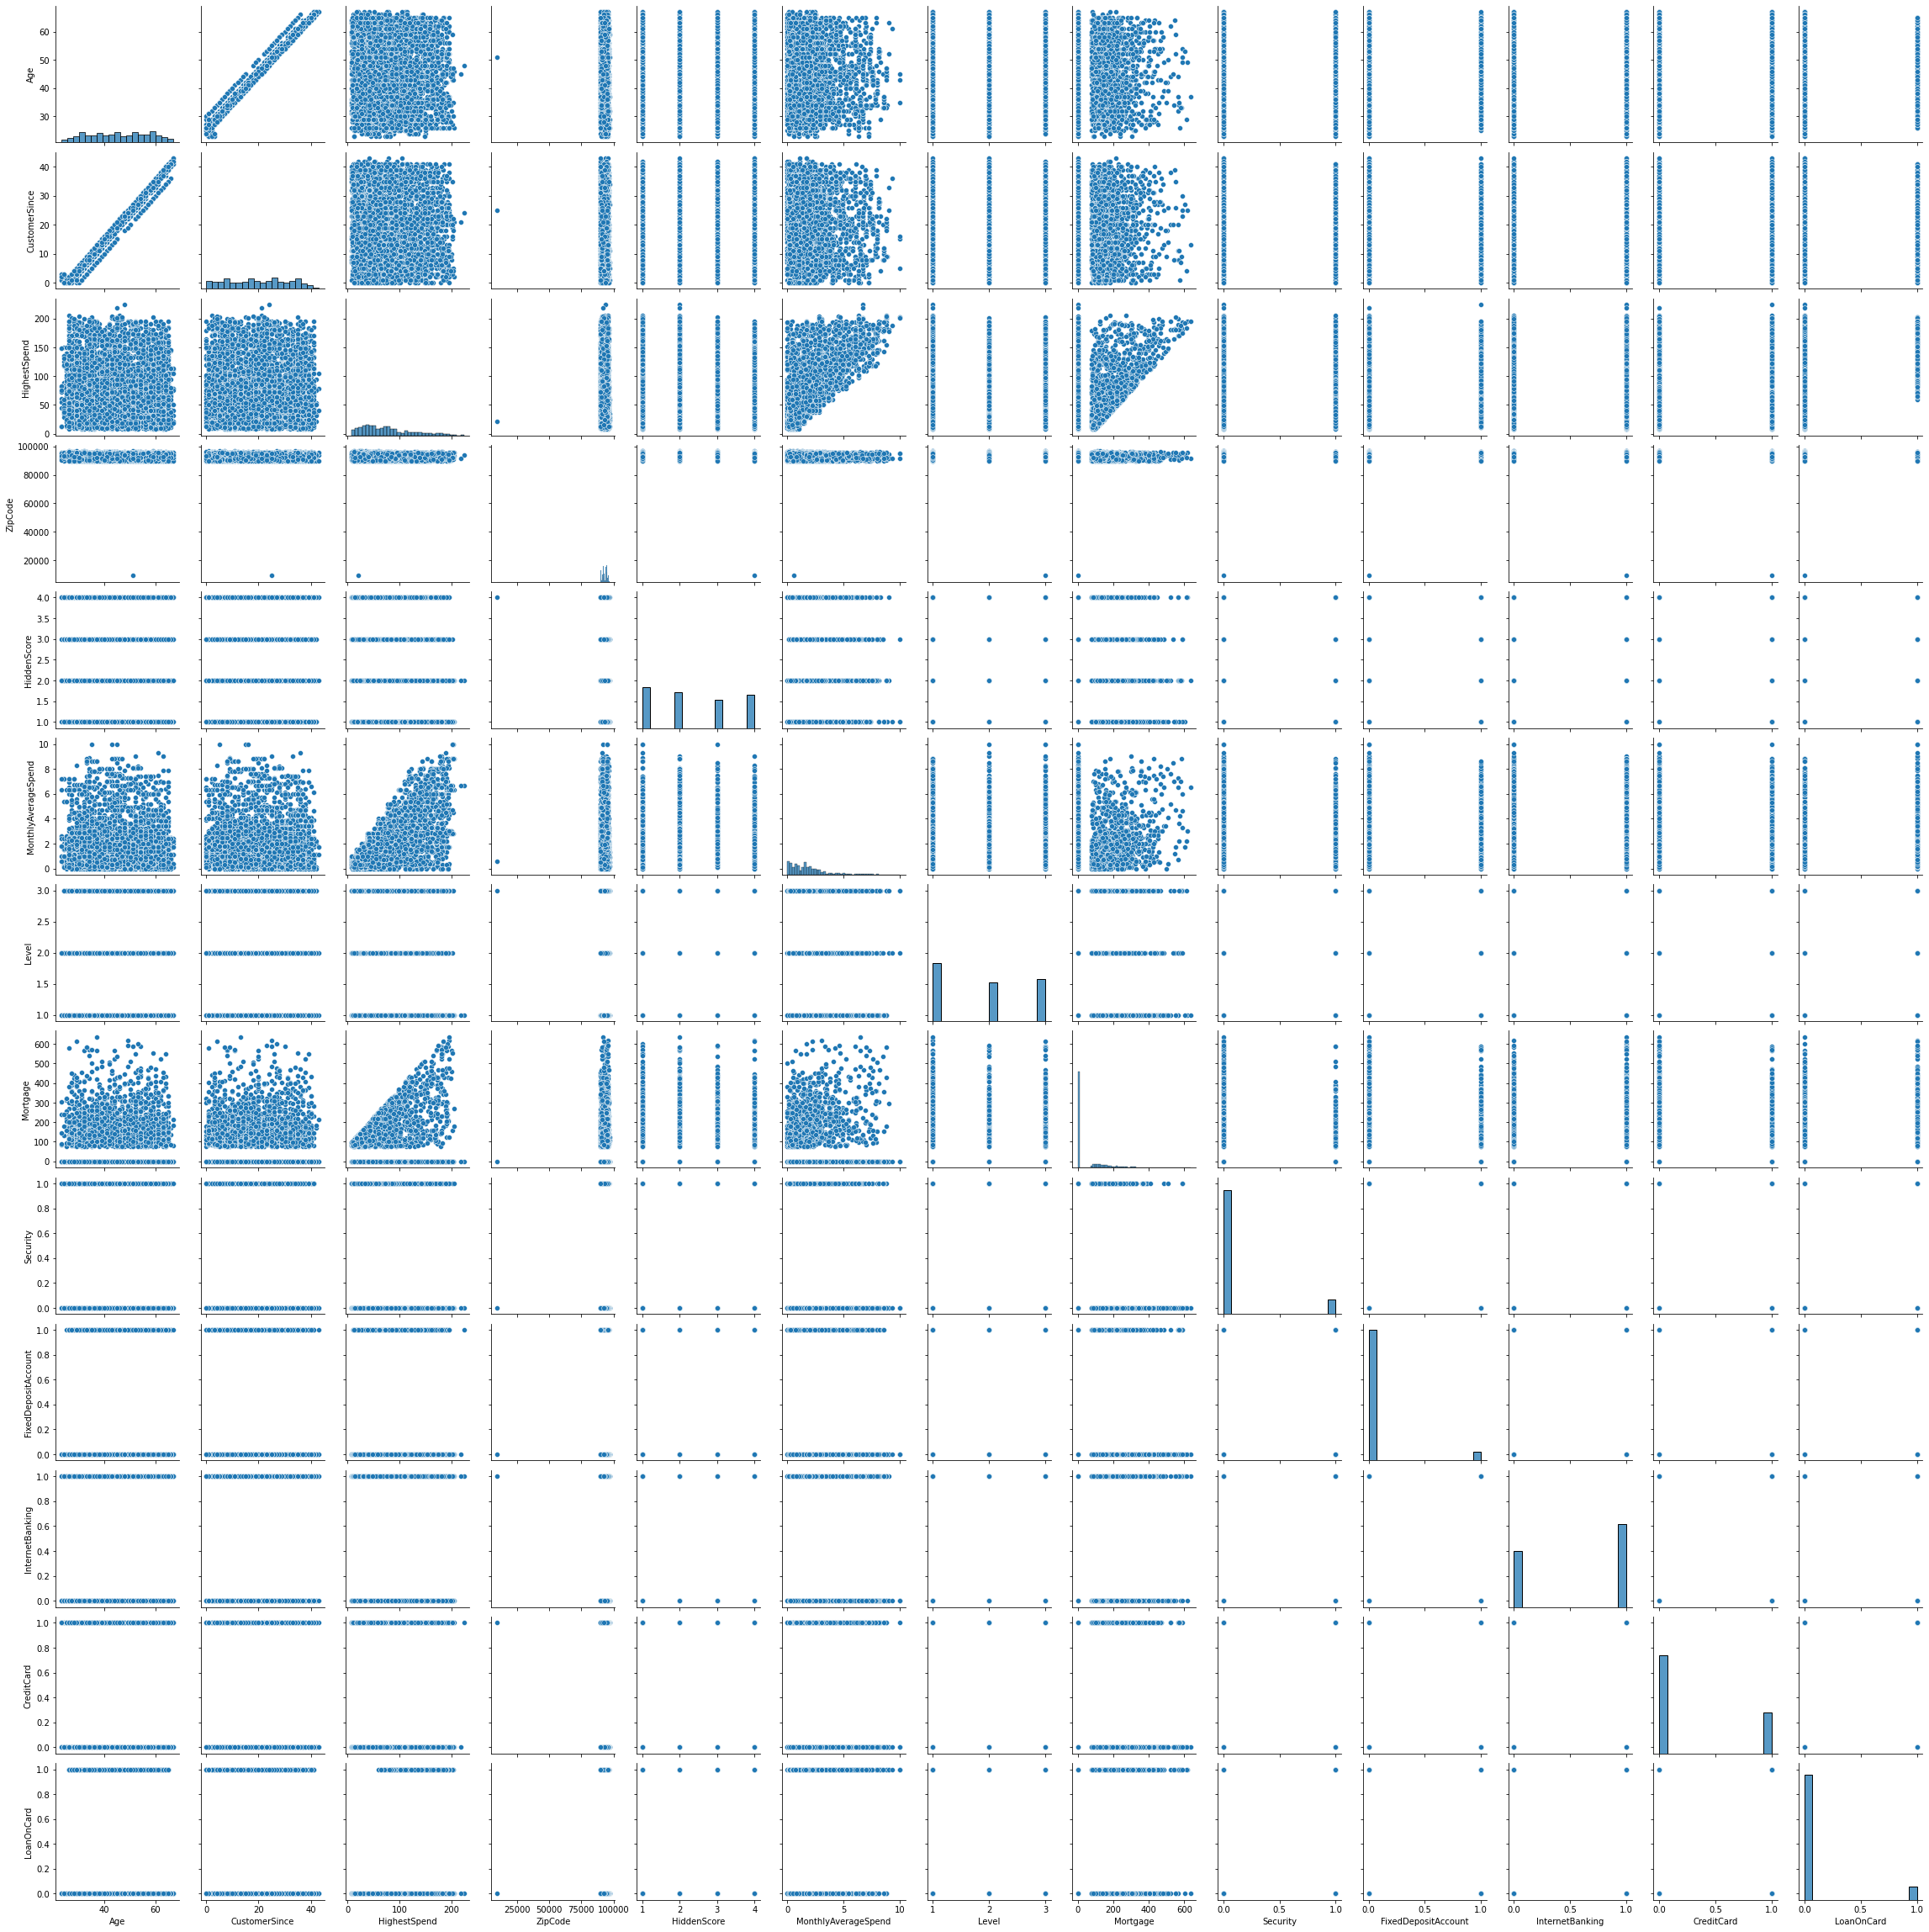

In [1130]:
sns.pairplot(ds)

**From the above pairplot it can be understood that age and CustomerSince variable has linear relationship**

**Regarding ZipCode, it is varied between certain values for all the variables, not having much effect**

Changing the data type of InternetBanking, CreditCard, LoanOnCard, HiddenScore, Level, Security and FixedDepositAccount to category

In [1131]:
ds=ds.astype({'InternetBanking':'category','CreditCard':'category','LoanOnCard':'category','HiddenScore':'category','Level':'category','Security':'category','FixedDepositAccount':'category'})

In [1132]:
ds.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

**Checking the correlation among the parameters to remove any redundant columns**

In [1133]:
ds.corr()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
Age,1.000000,0.993984,-0.054951,-0.029939,-0.051896,-0.013272
CustomerSince,0.993984,1.000000,-0.046424,-0.029748,-0.049585,-0.011883
HighestSpend,-0.054951,-0.046424,1.000000,-0.016447,0.646109,0.207236
ZipCode,-0.029939,-0.029748,-0.016447,1.000000,-0.004339,0.007214
MonthlyAverageSpend,-0.051896,-0.049585,0.646109,-0.004339,1.000000,0.110275
Mortgage,-0.013272,-0.011883,0.207236,0.007214,0.110275,1.000000


Age and CustomerSince have correlation of 99.39%, so either of two can be dropped

In [1134]:
X=ds.drop(['LoanOnCard','Age'],axis=1)#Dropped Age column as it has high correlation with CustomerSince column
Y=ds['LoanOnCard']

**Converting the categorical variables into dummy variables**

In [1135]:
X_std = pd.get_dummies(X, drop_first=True)

**Standardising the data**

In [1136]:
from sklearn.preprocessing import StandardScaler
X_std1=pd.DataFrame(StandardScaler().fit_transform(X_std))
X_std1.columns=X_std.columns

In [1137]:
X_std1.head()

,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_2,Level_3,Security_1,FixedDepositAccount_1,InternetBanking_1,CreditCard_1
0,-0.976533,2.304277,-0.060948,3.977793,-0.555747,-0.592192,-0.503136,-0.568075,-0.623796,1.526066,-0.341456,-0.254082,-1.217601,-0.645901
1,1.651526,0.676159,0.733515,0.263148,-0.555747,-0.592192,-0.503136,1.760331,-0.623796,1.526066,-0.341456,-0.254082,-1.217601,-0.645901
2,-1.326941,-0.626335,-1.354129,-1.051265,-0.555747,-0.592192,1.987536,-0.568075,1.603088,-0.655280,-0.341456,-0.254082,0.821287,-0.645901
3,0.249894,0.871533,-0.021861,1.063225,-0.555747,1.688641,-0.503136,-0.568075,-0.623796,1.526066,2.928638,-0.254082,-1.217601,-0.645901
4,1.038312,-0.734876,0.832411,0.320296,-0.555747,-0.592192,-0.503136,1.760331,1.603088,-0.655280,-0.341456,-0.254082,0.821287,-0.645901


In [1138]:
X_std1.dtypes

CustomerSince            float64
HighestSpend             float64
ZipCode                  float64
MonthlyAverageSpend      float64
Mortgage                 float64
HiddenScore_2            float64
HiddenScore_3            float64
HiddenScore_4            float64
Level_2                  float64
Level_3                  float64
Security_1               float64
FixedDepositAccount_1    float64
InternetBanking_1        float64
CreditCard_1             float64
dtype: object

**Splitting the data into train and test sets**

In [1139]:
X_std1=X_std1.drop('ZipCode',axis=1)#dropping the ZipCode

In [1140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std1, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

(3486, 13)
(1494, 13)


## Logistic Regression

In [1141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Log_model = LogisticRegression(random_state=0)
Log_model.fit(X_train, y_train)
y_pred = Log_model.predict(X_test)
y_pred_train = Log_model.predict(X_train)

print("Train data accuracy: "+str(accuracy_score(y_train, y_pred_train)))
print("Test data accuracy: "+str(accuracy_score(y_test, y_pred)))

Train data accuracy: 0.9647160068846816
Test data accuracy: 0.9538152610441767


Model got 96.47% train accuracy and 95.38% test accuracy

In [1142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1341
         1.0       0.88      0.63      0.74       153

    accuracy                           0.95      1494
   macro avg       0.92      0.81      0.86      1494
weighted avg       0.95      0.95      0.95      1494



Model got precision of 96% and 88% for 0 and 1 respectively

Model got recall of 99% and 63% for 0 and 1 respectively

Recall of 63% i.e.; less value is achieved because of imbalanced data

<AxesSubplot:>

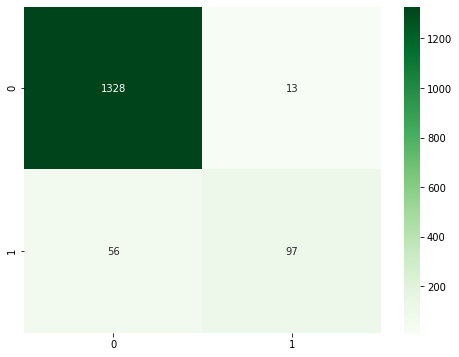

In [1143]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix
Log_conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
plt.figure(figsize = (8,6))
sns.heatmap(Log_conf_mat, annot=True,cmap='Greens', fmt='g')

## Naive_Bayes

In [1144]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
y_pred_train = NB_model.predict(X_train)

print("Train data accuracy: "+str(accuracy_score(y_train, y_pred_train)))
print("Test data accuracy: "+str(accuracy_score(y_test, y_pred)))

Train data accuracy: 0.8895582329317269
Test data accuracy: 0.8828647925033467


Model got 88.95% train accuracy and 88.28% test accuracy

In [1145]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1341
         1.0       0.45      0.58      0.50       153

    accuracy                           0.88      1494
   macro avg       0.70      0.75      0.72      1494
weighted avg       0.90      0.88      0.89      1494



Model got precision of 95% and 44% for 0 and 1 respectively

Model got recall of 92% and 56% for 0 and 1 respectively

Recall of 56% i.e.; less value is achieved because of imbalanced data

<AxesSubplot:>

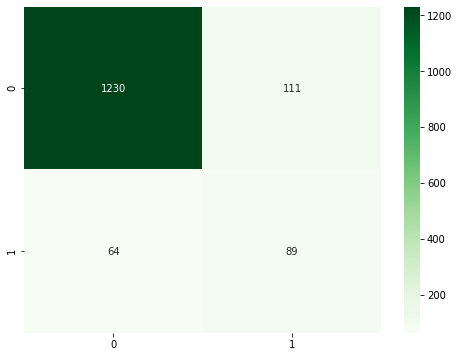

In [1146]:
# printing confusion matrix
NB_conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
plt.figure(figsize = (8,6))
sns.heatmap(NB_conf_mat, annot=True,cmap='Greens', fmt='g')

Logistic regression model can be chosen as it has good accuracy and recall ratio over the Naive_Bayes classifier model

**Improvisation**

CustomerSince column had negative value as this is number of years, it can't have negative values. It could be found out as the minimum value was negative. But if it is not checked properly model may give less accuracy.

So while collecting the data, values can be verified once.